# Question 1: Min volume ellipsoid (2 points)

Consider
$$ \mathcal{E}_0 = \{\mathbf{x} : \mathbf{x}^T P_0^{−1} \mathbf{x} ≤ 1 \} $$
$$  P_0 = \begin{bmatrix} 1 & 0 \\ 0 & 4 \end{bmatrix}  $$


Construct (give the formula and plot) the min volume ellipsoid that covers: $ \mathcal{E}_0 ∩ \{\mathbf{x}: W \mathbf{x} ≤ 0 \} $ for:

*   $ W = [1; 0] $
*   $ W = [1/2; −1/2] $

Provide $ \frac{vol(\mathcal{E})}{vol(\mathcal{E}_0)} $ for both cases.



---



$$
\begin{aligned} 
\mathcal{E}_0 
&= \{ x : (x-x_c)^T P_0^{−1} (x-x_c) ≤ 1 \}  \\
&= \{ x : (x - 0)^T \begin{bmatrix} 1 & 0 \\ 0 & 1/4 \end{bmatrix} (x - 0) ≤ 1 \} 
\end{aligned}
$$

Center is $(0,0).$

$$ vol(\mathcal{E}) = β_n det(P) $$
$$ \frac{vol(\mathcal{E})}{vol(\mathcal{E}_0)} = \frac{det(P)}{det(P_0)} $$

In [1]:
!pip install numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 3.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
from matplotlib.patches import Ellipse 

In [4]:
P0 = np.array([[1, 0], [0, 4]])
W1 = np.array([1, 0])
W2 = np.array([0.5, -0.5])
c0 = np.array([0, 0]).T
x0 = np.array([1, 0]).T

def func(x, c = c0, P = P0):
    return (x-c).T @ np.linalg.inv(P) @ (x-c)

def grad_func(func, x):
    return nd.Gradient(func)(x)

W = [1 0]
center* is ((1.7600945796635892e-05, 0.0)), number of iterations = 27.
vol_E/vol_E_0 = 7.31842959910327e-07


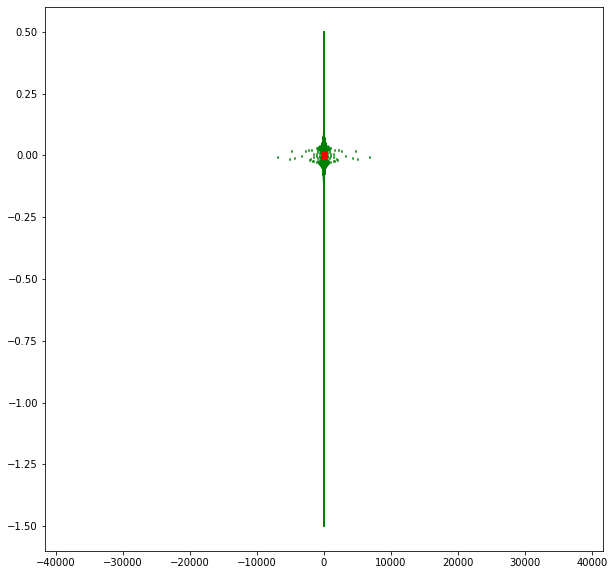

In [21]:
def ellipsoid(x, c = c0, W = W1, P = P0, n = 2, max_iter = 1000):
    W = W.reshape((W.shape[0], 1))
    x = x.reshape((x.shape[0], 1))
    c = x.reshape((c.shape[0], 1))

    iter = 0
    M = 100

    vol_E_0 = np.linalg.det(P)

    plt.figure(figsize = (10, 10))

    for i in range(max_iter):
        # if iter == 0:

        # print(P[0][0], P[1][1])
        t = np.linspace(0, 2*np.pi, M)
        u = np.array([np.sin(t), np.cos(t)]).T # unit ball 
        A = np.linalg.cholesky(P)
        ELP = np.array([np.linalg.inv(A) @ u[i,:] - c for i in range(M)]) # ϵ
        plt.plot(*ELP.T, 'g-')

        plt.plot(c[0][0], c[1][0], 'ro') 

        # # check center
        # if ((x - c).T @ W)[0] <= 0:
        #     # find separating hyperplane w
        #     W = W
        # else:
        #     W = grad_func(func, x)
        #     W = W.reshape((W.shape[0], 1))

        # update c and P
        c_old = c
        c = c - (1/(n+1) * (P @ W)/np.sqrt((W.T @ P @ W)[0][0]))
        P = (n**2)/(n**2 -1) * (P - 2/(n+1) * (P @ W @ W.T @ P)/(W.T @ P @ W))

        plt.plot(c[0][0], c[1][0], 'ro') 

        iter += 1
        if np.abs(np.linalg.norm(c - c_old)) < 1e-5:
            print(f'center* is ({c[0][0], c[1][0]}), number of iterations = {iter}.')
            break

    vol_E = np.linalg.det(P)
    print(f'vol_E/vol_E_0 = {vol_E/vol_E_0}')

    return iter

print(f'W = {W1}')
ellipsoid(x0, c = c0, W = W1);

W = [ 0.5 -0.5]
center* is ((0.5527899038254637, 1.7888403897497527)), number of iterations = 29.
vol_E/vol_E_0 = 2.5668045953385465e-07


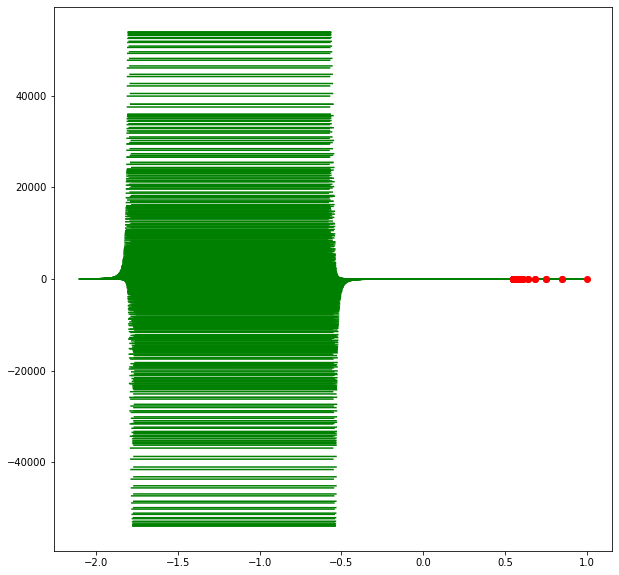

In [22]:
print(f'W = {W2}')
ellipsoid(x0, c = c0, W = W2);

W = [1 0]
center* is ((1.7600945796635892e-05, 0.0)), number of iterations = 27.
vol_E/vol_E_0 = 7.31842959910327e-07


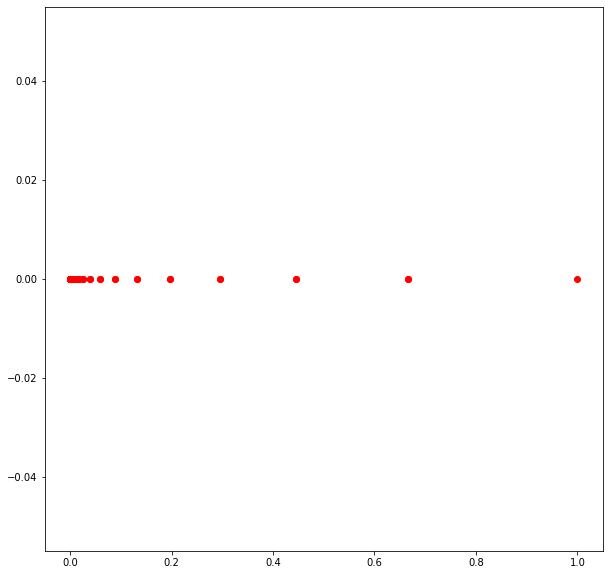

In [23]:
def ellipsoid(x, c = c0, W = W1, P = P0, n = 2, max_iter = 1000):
    W = W.reshape((W.shape[0], 1))
    x = x.reshape((x.shape[0], 1))
    c = x.reshape((c.shape[0], 1))

    iter = 0
    M = 100

    vol_E_0 = np.linalg.det(P)

    plt.figure(figsize = (10, 10))

    for i in range(max_iter):

        plt.plot(c[0][0], c[1][0], 'ro') 

        # # check center
        # if ((x - c).T @ W)[0] <= 0:
        #     # find separating hyperplane w
        #     W = W
        # else:
        #     W = grad_func(func, x)
        #     W = W.reshape((W.shape[0], 1))

        # update c and P
        c_old = c
        c = c - (1/(n+1) * (P @ W)/np.sqrt((W.T @ P @ W)[0][0]))
        P = (n**2)/(n**2 -1) * (P - 2/(n+1) * (P @ W @ W.T @ P)/(W.T @ P @ W))

        plt.plot(c[0][0], c[1][0], 'ro') 

        iter += 1
        if np.abs(np.linalg.norm(c - c_old)) < 1e-5:
            print(f'center* is ({c[0][0], c[1][0]}), number of iterations = {iter}.')
            break

    vol_E = np.linalg.det(P)
    print(f'vol_E/vol_E_0 = {vol_E/vol_E_0}')

    return iter

print(f'W = {W1}')
ellipsoid(x0, c = c0, W = W1);

W = [ 0.5 -0.5]
center* is ((0.5527899038254637, 1.7888403897497527)), number of iterations = 29.
vol_E/vol_E_0 = 2.5668045953385465e-07


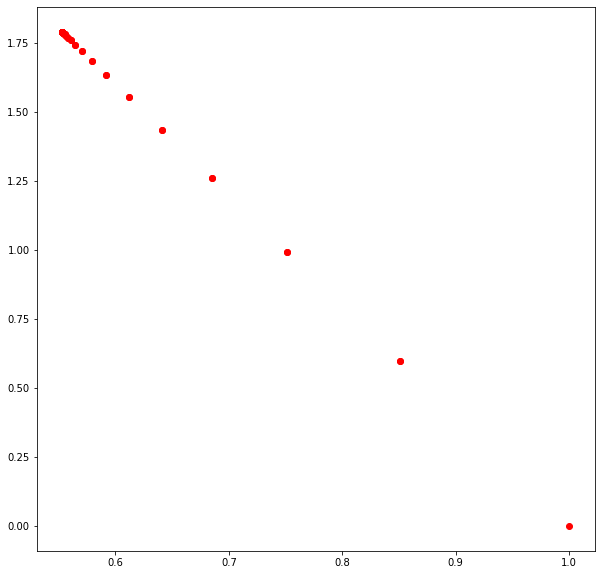

In [24]:
print(f'W = {W2}')
ellipsoid(x0, c = c0, W = W2);

# Question 2: ADMM for LASSO (3 points)

Solve the following problem:

$$  \min_x \frac{1}{2} \|Ax − b\| _2^2 + λ \|x\| _1  $$
$$  A : m × n, m < n  $$
$$  x : n × 1  $$

Define the problem parameters:

*   $ n = 250, m = 75, A_{ij} ∼ 𝓝(0,1), $ normalize columns of $ A : a → \frac{a}{\|a\| _2} $

*   generate $x^⋆$ with 5 non-zero entries $ ∼ 𝓝(0,1) $

*   $ b = Ax^∗ + ξ, ξ ∼ 𝓝(0,10^{-2}I) $

*   $ λ = 0.1\|A^T b\| _∞ $, for $ λ > \|A^T b\| _∞ $ you’ll get $ x = 0 $ – because of too large penalization term $ λ\|x\| _1 $


Run ADMM (use $ ρ = 1, r^k = x^k − z^k, \|r^k\| _2 ≤ 10^{−4} $ as a stopping criterion) and any other (e.g. first-order) unconstrained optimization method. Compare convergence and CPU time.



---



ADMM for LASSO

$$  \min_x \frac{1}{2} \| Ax − b \| _2^2 + λ\|x\| _1  ⟺  \min_{x = z} \bigg( \frac{1}{2} \| Ax − b \| _2^2 + λ \|z\| _1 \bigg)  $$

Updat value:

\begin{aligned}
x^{k+1} &= (A^T A + ρI)^{−1} (A^T b + ρ(z^k − u^k))  \\
z^{k+1} &= S_{λ/ρ} (x^{k+1} + u^k)  \\
u^{k+1} &= u^k + x^{k+1} − z^{k+1}
\end{aligned}

where:
$$ \text{soft threshold } S_{λ/ρ}(a) = 
\begin{cases}
    a - \frac{λ}{ρ} & \text{;} \ a > \frac{λ}{ρ}   \\
    0   \quad \quad & \text{;} \ |a| ≤ \frac{λ}{ρ} \\
    a + \frac{λ}{ρ} & \text{;} \ a < - \frac{λ}{ρ}  
\end{cases}
$$

In [ ]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import inv as sparse_inv
import time

# ADMM
def admm(A, b, lambd, rho=1, max_iter=5000, tol=1e-4):
    m, n = A.shape
    # initial x, z, u
    x = np.zeros((n, 1))
    z = np.zeros((n, 1))
    u = np.zeros((n, 1))

    inv_part = sparse_inv(csc_matrix(A.T @ A + rho * np.eye(n)))
    ATb = A.T @ b
    iter = 0
    
    for i in range(max_iter):
        # Update x
        rest_part = ATb + rho * (z - u)
        x = inv_part @ rest_part

        # Update z
        z_old = z.copy()
        z = np.sign(x + u) * np.maximum(np.abs(x + u) - lambd/rho, 0)

        # Update u
        u = u + x - z

        # Check convergence
        r_norm = np.linalg.norm(x - z)
        s_norm = np.linalg.norm(-rho * (z - z_old))
        if r_norm < tol and s_norm < tol:
            break
        iter += 1
    return x, iter

In [ ]:
# Generate data
np.random.seed(0)
n = 250
m = 75
A = np.random.normal(0, 1, size=(m, n))
A /= np.linalg.norm(A, axis=0)

x_true = np.zeros((n, 1))
x_true[np.random.choice(n, 5, replace=False)] = np.random.randn(5, 1)

b = A @ x_true + np.random.normal(0, 0.01, size=(m, 1))
lamb = 0.1 * np.max(np.abs(A.T @ b))  

# Run ADMM
start_time_admm = time.time()
x_admm, iter_admm = admm(A, b, lamb)
cpu_admm = time.time() - start_time_admm
obj_val = 0.5 * np.linalg.norm(A @ x_admm - b)**2 + lamb * np.linalg.norm(x_admm, ord=1)

print(f'ADMM method \nCPU time: %.5f \nNumber of iterations: {iter_admm}' %cpu_admm)
print(f'Objective value: %.5f' %obj_val)
print(f'x* = {x_admm}')

ADMM method 
CPU time: 0.41874 
Number of iterations: 43
Objective value: 0.34916
x* = [[-1.19226535e-06]
 [ 3.79593904e-06]
 [-3.19566476e-06]
 [-1.24270421e-05]
 [-1.17926521e+00]
 [ 5.13885342e-07]
 [-4.62782948e-06]
 [ 6.46684194e-06]
 [ 6.86941298e-06]
 [ 6.55228196e-07]
 [-4.96552041e-07]
 [-6.65808188e-06]
 [-5.23404380e-06]
 [ 3.03932406e-06]
 [ 3.14828463e-06]
 [ 8.47550798e-07]
 [-3.76727014e-06]
 [-8.92575709e-09]
 [-1.21417143e-05]
 [ 4.10828684e-06]
 [ 1.67596699e-06]
 [-1.71916597e-06]
 [-4.41279344e-06]
 [-4.84946630e-06]
 [-1.21252485e-06]
 [ 5.35312187e-06]
 [-4.47603150e-06]
 [ 7.27677331e-06]
 [ 1.62840985e-06]
 [-3.52791519e-06]
 [-1.22025591e-05]
 [-1.50028729e-06]
 [-7.18194976e-06]
 [ 2.49727771e-06]
 [ 2.45644839e-06]
 [-7.07531208e-06]
 [ 3.78600857e-06]
 [-9.21196076e-06]
 [-1.22733087e-06]
 [-3.56143750e-06]
 [-8.76009619e-06]
 [ 3.38360021e-06]
 [-8.58653262e-06]
 [-8.61086713e-06]
 [ 2.78879388e-06]
 [ 1.59067212e-06]
 [-9.20492035e-06]
 [ 3.66450453e-06]
 

In [ ]:
# Gradient descent
def lasso_grad(A, b, lambd, max_iter=5000):
    m, n = A.shape
    x = np.zeros((n, 1))
    alpha = 0.5
    beta = 0.01
    iter = 0
    for i in range(max_iter):
        # Compute gradient
        grad = A.T @ (A @ x - b) + lambd * np.sign(x)

        # Line search
        f = 0.5 * np.linalg.norm(A @ x - b)**2 + lambd * np.linalg.norm(x, ord=1)

        while True:
            x_new = x - alpha * grad
            f_new = 0.5 * np.linalg.norm(A @ x_new - b)**2 + lambd * np.linalg.norm(x_new, 1)
            
            if f_new <= f - alpha * np.linalg.norm(grad)**2 / 2:
                break

            alpha *= beta

        x = x_new
        iter += 1
    return x, iter

In [ ]:
# Run gradient descent
start_time_grad = time.time()
x_grad, iter_grad = lasso_grad(A, b, lamb)
cpu_grad = time.time() - start_time_grad
obj_val_grad = 0.5 * np.linalg.norm(A @ x_grad - b)**2 + lamb * np.linalg.norm(x_grad, ord=1)

print(f'ADMM method \nCPU time: %.5f \nNumber of iterations: {iter_grad}' %cpu_grad)
print(f'Objective value: %.5f' %obj_val_grad)
print(f'x* = {x_grad}')

ADMM method 
CPU time: 0.89681 
Number of iterations: 5000
Objective value: 0.91313
x* = [[-4.09515292e-16]
 [ 5.14913622e-03]
 [ 3.42352274e-16]
 [-7.68591845e-03]
 [-1.67658318e-01]
 [ 2.82698375e-02]
 [ 3.49446567e-03]
 [ 2.14203434e-02]
 [-2.42543368e-03]
 [-1.61623584e-02]
 [-1.36610450e-02]
 [-1.85624682e-16]
 [-1.34655597e-02]
 [-1.50616399e-02]
 [ 2.27675314e-20]
 [ 2.64767490e-02]
 [-3.02167408e-06]
 [-5.02018749e-02]
 [ 2.74733569e-04]
 [ 3.77736515e-02]
 [ 1.33011318e-12]
 [-1.96158076e-04]
 [-3.64234238e-02]
 [ 2.38628404e-02]
 [-5.24749080e-04]
 [ 3.04425522e-02]
 [-5.15937760e-16]
 [-1.22016032e-16]
 [ 8.10360380e-16]
 [-1.56200183e-02]
 [-3.81686884e-02]
 [-3.89379388e-04]
 [ 3.21422225e-16]
 [-4.58034429e-04]
 [-5.77307851e-03]
 [-3.42355550e-05]
 [-7.88318025e-03]
 [-1.00118760e-02]
 [ 3.15833185e-20]
 [ 2.29269941e-04]
 [-1.27956314e-06]
 [-3.01958330e-20]
 [-1.20176341e-20]
 [ 1.70836640e-04]
 [-2.79985964e-02]
 [ 1.36728452e-02]
 [ 8.46844346e-21]
 [ 4.75479246e-03]

The convergence and CPU time for these 2 algorithms are different. ADMM can be converged faster and use less CPU time.

# Question 3: Linear Programming Example (3 points)

A cargo plane has three compartments for storing cargo: front, centre, and rear. These compartments have the following limits on both weight and space:

$$  \begin{array}{lll}
\text{Compartment} & \text{Weight capacity (tonnes)} & \text{Space capacity (cubic metres)} \\ 
\text{Front} & 10 & 6800 \\ 
\text{Centre} & 16 & 8700 \\ 
\text{Rear} & 8 & 5300
\end{array}  $$

Furthermore, the weight of the cargo in the respective compartments must be the same proportion of that compartment’s weight capacity to maintain the balance of the plane. The following four cargoes are available for shipment on the next flight:

$$  \begin{array}{llll}
\text{Cargo} & \text{Weight (tonnes)} & \text{Volume (cubic metres/tonne)} & \text{Profit (\$/tonne)} \\ 
\text{C1} & 18 & 480 & 310 \\ 
\text{C2} & 15 & 650 & 380 \\ 
\text{C3} & 23 & 580 & 350 \\ 
\text{C4} & 12 & 390 & 285
\end{array}  $$

Any proportion of these cargoes can be accepted. The objective is to determine how much (if any) of each cargo $ C1, C2, C3 $ and $ C4 $ should be accepted and how to distribute each among the compartments so that the total profit for the flight is maximized.

1.   Formulate the above problem as a linear program.
2.   What assumptions have you made in formulating this problem as a linear program?
3.   Solve the problem using scipy.optimize.linprog in Python.
4.   Solve the problem using the ellipsoid method. Plot the graph showing how the ellipsoid volume decreases. Count the number of iterations.
5.   Sensitivity to the constraint values. What if the available cargoes weight increases/decreases by 10%? Define which cargo weight has the greatest impact on the total profit. Explain the dependence between dual variables and changes in the total profit.


---




(1) 

Denote that: 
$$ \text{Front comparment} = F, \quad \text{Center comparment} = C, \quad \text{Rear comparment} = R, $$

$$ \text{Cargo C1} = C_1, \quad \text{Cargo C2} = C_2, \quad \text{Cargo C3} = C_3, \quad \text{Cargo C4} = C_4 $$

<br>

***We want to maximize profit.***
<br>
So, objective function is
<br>

$$
\max 310(w_{F,C_1} + w_{C,C_1} + w_{R, C_1}) 
+ 380(w_{F,C_2} + w_{C,C_2} + w_{R, C_2}) 
+ 350(w_{F,C_3} + w_{C,C_3} + w_{R, C_3}) 
+ 285(w_{F,C_4} + w_{C,C_4} + w_{R, C_4})
$$

<br>

Constraints:

\begin{aligned} 
\sum_{i=1}^4 w_{F,C_i} &≤ 10 \\
\sum_{i=1}^4 w_{C,C_i} &≤ 16 \\
\sum_{i=1}^4 w_{R,C_i} &≤ 8  \\
480 w_{F,C_1} + 650 w_{F,C_2} + 580 w_{F,C_3} + 390 w_{F,C_4} &≤ 6800 \\
480 w_{C,C_1} + 650 w_{C,C_2} + 580 w_{C,C_3} + 390 w_{C,C_4} &≤ 8700 \\
480 w_{R,C_1} + 650 w_{R,C_2} + 580 w_{R,C_3} + 390 w_{R,C_4} &≤ 5300 \\
w_{F,C_1} + w_{C,C_1} + w_{R,C_1} &≤ 18 \\
w_{F,C_2} + w_{C,C_2} + w_{R,C_2} &≤ 15 \\
w_{F,C_3} + w_{C,C_3} + w_{R,C_3} &≤ 23 \\
w_{F,C_4} + w_{C,C_4} + w_{R,C_4} &≤ 12 \\
\frac{\sum_{i=1}^4 w_{F, C_i}}{10} - \frac{\sum_{i=1}^{4} w_{C, C_i}}{16} &= 0\\
\frac{\sum_{i=1}^4 w_{F, C_i}}{10} - \frac{\sum_{i=1}^{4} w_{R, C_i}}{8} &= 0\\
\frac{\sum_{i=1}^4 w_{C, C_i}}{16} - \frac{\sum_{i=1}^{4} w_{R, C_i}}{8} &= 0
\end{aligned} 



---


(2)

Assumptions:


$$ w_{F, C_i}, w_{R, C_i}, w_{C, C_i} ∈ \mathbb{R} ; \quad  w_{F, C_i}, w_{R, C_i}, w_{C, C_i} ≥ 0 $$ 



---




In [ ]:
# (3)
import numpy as np
from scipy.optimize import linprog
from sympy import latex

c = [-310, -310, -310,      -380, -380, -380,       -350, -350, -350,       -285, -285, -285]

A_1 = np.array([[1, 0, 0,       1, 0, 0,        1, 0, 0,        1, 0, 0],
                [0, 1, 0,       0, 1, 0,        0, 1, 0,        0, 1, 0],
                [0, 0, 1,       0, 0, 1,        0, 0, 1,        0, 0, 1],

                [480, 0, 0,     650, 0, 0,      580, 0, 0,      390, 0, 0],
                [0, 480, 0,     0, 650, 0,      0, 580, 0,      0, 390, 0],
                [0, 0, 480,     0, 0, 650,      0, 0, 580,      0, 0, 390],

                [1, 1, 1,       0, 0, 0,        0, 0, 0,        0, 0, 0],
                [0, 0, 0,       1, 1, 1,        0, 0, 0,        0, 0, 0],
                [0, 0, 0,       0, 0, 0,        1, 1, 1,        0, 0, 0],
                [0, 0, 0,       0, 0, 0,        0, 0, 0,        1, 1, 1]])

A_2 = [[1/10, -1/16, 0,      1/10, -1/16, 0,     1/10, -1/16, 0,     1/10, -1/16, 0],
       [1/10, 0, -1/8,       1/10, 0, -1/8,      1/10, 0, -1/8,      1/10, 0, -1/8],
       [0, 1/16, -1/8,       0, 1/16, -1/8,      0, 1/16, -1/8,      0, 1/16, -1/8]]

b_1 = [10, 16, 8, 6800, 8700, 5300, 18, 15, 23, 12]

b_2 = [0, 0, 0]

res = linprog(c, A_ub = A_1, b_ub = b_1, A_eq = A_2, b_eq = b_2)
optimal_profit = -res.fun
optimal_points = res.x

print(f'The optimal profit is {optimal_profit} $.\n')

print(f'optimal weight for front comparment, cargo C1 = {optimal_points[0]}')
print(f'optimal weight for centre comparment, cargo C1 = {optimal_points[1]}')
print(f'optimal weight for rear comparment, cargo C1 = {optimal_points[2]}\n')

print(f'optimal weight for front comparment, cargo C2 = {optimal_points[3]}')
print(f'optimal weight for centre comparment, cargo C2 = {optimal_points[4]}')
print(f'optimal weight for rear comparment, cargo C2 = {optimal_points[5]}\n')

print(f'optimal weight for front comparment, cargo C3 = {optimal_points[6]}')
print(f'optimal weight for centre comparment, cargo C3 = {optimal_points[7]}')
print(f'optimal weight for rear comparment, cargo C3 = {optimal_points[8]}\n')

print(f'optimal weight for front comparment, cargo C4 = {optimal_points[9]}')
print(f'optimal weight for centre comparment, cargo C4 = {optimal_points[10]}')
print(f'optimal weight for rear comparment, cargo C4 = {optimal_points[11]}\n')


The optimal profit is 12151.57894736842 $.

optimal weight for front comparment, cargo C1 = 0.0
optimal weight for centre comparment, cargo C1 = 0.0
optimal weight for rear comparment, cargo C1 = 0.0

optimal weight for front comparment, cargo C2 = 10.0
optimal weight for centre comparment, cargo C2 = 0.0
optimal weight for rear comparment, cargo C2 = 5.0

optimal weight for front comparment, cargo C3 = 0.0
optimal weight for centre comparment, cargo C3 = 12.947368421052632
optimal weight for rear comparment, cargo C3 = 3.0

optimal weight for front comparment, cargo C4 = 0.0
optimal weight for centre comparment, cargo C4 = 3.052631578947368
optimal weight for rear comparment, cargo C4 = 0.0



In [ ]:
# (5)

b_1 = [10, 16, 8, 6800, 8700, 5300, 18, 15, 23, 12]

for i in range(6, 10):
    b_1_i = b_1[i]
  
    b_1[i] = 1.1 * b_1_i
    res_1 = linprog(c, A_ub = A_1, b_ub = b_1, A_eq = A_2, b_eq = b_2)

    if abs(optimal_profit + res_1.fun) > 0:
        print(f'optimal profit before = {optimal_profit}, new profit = {-res_1.fun}')

    print(f'If weight of cargo C{i-5} increased by 10%, the optimal profit change = {abs(optimal_profit + res_1.fun) / optimal_profit * 100} %')

 
    b_1[i] = 0.9 * b_1_i
    res_2 = linprog(c, A_ub = A_1, b_ub = b_1, A_eq = A_2, b_eq = b_2)

    if abs(optimal_profit + res_2.fun) > 0:
        print(f'optimal profit before = {optimal_profit}, new profit = {-res_2.fun}')

    print(f'If weight of cargo C{i-5} decreased by 10%, the optimal profit change = {abs(optimal_profit + res_2.fun) / optimal_profit * 100} %')

    print('')

    b_1[i] = b_1_i

If weight of cargo C1 increased by 10%, the optimal profit change = 0.0 %
If weight of cargo C1 decreased by 10%, the optimal profit change = 0.0 %

optimal profit before = 12151.57894736842, new profit = 12196.57894736842
If weight of cargo C2 increased by 10%, the optimal profit change = 0.37032224532224534 %
optimal profit before = 12151.57894736842, new profit = 12106.57894736842
If weight of cargo C2 decreased by 10%, the optimal profit change = 0.37032224532224534 %

If weight of cargo C3 increased by 10%, the optimal profit change = 0.0 %
If weight of cargo C3 decreased by 10%, the optimal profit change = 0.0 %

If weight of cargo C4 increased by 10%, the optimal profit change = 0.0 %
If weight of cargo C4 decreased by 10%, the optimal profit change = 0.0 %



Cargo weight of C2 has the greatest impact on the total profit. If the cargo weight of C2 increased or decreased by 10%, the total profit will be increased or decreased by approximately 0.3703% respectively.